In [1]:
import pandas as pd
import json
from sklearn.metrics import silhouette_samples 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Part A

**DOMAIN:** Automobile

**CONTEXT:** The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

**DATA DESCRIPTION:**
* cylinders: multi-valued discrete
* acceleration: continuous
* displacement: continuous
* model year: multi-valued discrete
* horsepower: continuous
* origin: multi-valued discrete
* weight: continuous
* car name: string (unique for each instance)
* mpg: continuous

**PROJECT OBJECTIVE:** To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

## STEPS AND TASK

# 1. Data Understanding & Exploration:

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
# Import Car name.csv and assign it to a variable
carname = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Part1 - Car name.csv')

# Display first 5 rows of the carname dataframe
carname.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [3]:
# Check info of the dataframe
carname.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
carattributes = pd.read_json('/content/drive/My Drive/Colab Notebooks/Part1+-+Car-Attributes.json')

# Display head of the Pandas object
carattributes.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [5]:
# Check info of the dataframe
carattributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


### C. Merge both the DataFrames together to form a single DataFrame

In [6]:
# Check the shape for both the dataframes first
# To confirm if the number of rows are same in both the dataframes
carname.shape, carattributes.shape

((398, 1), (398, 8))

In [7]:
# Number of rows are same in both the dataframes
# Let's concatenate both the dataframes, assuming that there is no particular order
car_data = pd.concat([carname,carattributes], axis=1).reindex(carname.index)
# reindex is used to retain the indexing of original dataframe which is carname in this case

# Display a random sample of merged dataframe
car_data.sample(50)

car_name   mpg  cyl   disp   hp    wt   acc  yr  \
349                      mazda glc 4  34.1    4   91.0   68  1985  16.0  81   
369        chevrolet cavalier 2-door  34.0    4  112.0   88  2395  18.0  82   
263  buick regal sport coupe (turbo)  17.7    6  231.0  165  3445  13.4  78   
174                       ford pinto  18.0    6  171.0   97  2984  14.5  75   
66                amc ambassador sst  17.0    8  304.0  150  3672  11.5  72   
57             toyota corona hardtop  24.0    4  113.0   95  2278  15.5  72   
309                        vw rabbit  41.5    4   98.0   76  2144  14.7  80   
293                 vw rabbit custom  31.9    4   89.0   71  1925  14.0  79   
56                  plymouth cricket  26.0    4   91.0   70  1955  20.5  71   
212                 cadillac seville  16.5    8  350.0  180  4380  12.1  76   
353                 volkswagen jetta  33.0    4  105.0   74  2190  14.2  81   
232                 ford thunderbird  16.0    8  351.0  149  4335  14.5  77   
142                volkswagen dasher  26.0    4   79.0   67  1963  15.5  74   
341               chevrolet citation  23.5    6  173.0  110  2725  12.6  81   
278              volkswagen scirocco  31.5    4   89.0   71  1990  14.9  78   
269                       dodge omni  30.9    4  105.0   75  2230  14.5  78   
33                       amc gremlin  19.0    6  232.0  100  2634  13.0  71   
364            oldsmobile cutlass ls  26.6    8  350.0  105  3725  19.0  81   
266               chevrolet chevette  30.0    4   98.0   68  2155  16.5  78   
190                 ford gran torino  14.5    8  351.0  152  4215  12.8  76   
199                   dodge aspen se  20.0    6  225.0  100  3651  17.7  76   
324                       datsun 210  40.8    4   85.0   65  2110  19.2  80   
5                   ford galaxie 500  15.0    8  429.0  198  4341  10.0  70   
86                       amc matador  14.0    8  304.0  150  3672  11.5  73   
226                    buick skylark  20.5    6  231.0  105  3425  16.9  77   
264                      ford futura  18.1    8  302.0  139  3205  11.2  78   
116               pontiac grand prix  16.0    8  400.0  230  4278   9.5  73   
301                 plymouth horizon  34.2    4  105.0   70  2200  13.2  79   
330             renault lecar deluxe  40.9    4   85.0    ?  1835  17.3  80   
339                    buick skylark  26.6    4  151.0   84  2635  16.4  81   
319                        mazda 626  31.3    4  120.0   75  2542  17.5  80   
297               mercedes benz 300d  25.4    5  183.0   77  3530  20.1  79   
128                   chevrolet nova  15.0    6  250.0  100  3336  17.0  74   
65                  ford galaxie 500  14.0    8  351.0  153  4129  13.0  72   
374                   amc concord dl  23.0    4  151.0    ?  3035  20.5  82   
344                   plymouth champ  39.0    4   86.0   64  1875  16.4  81   
194                       amc hornet  22.5    6  232.0   90  3085  17.6  76   
9                 amc ambassador dpl  15.0    8  390.0  190  3850   8.5  70   
311               chevrolet chevette  32.1    4   98.0   70  2120  15.5  80   
17                     ford maverick  21.0    6  200.0   85  2587  16.0  70   
103                 chevrolet impala  11.0    8  400.0  150  4997  14.0  73   
198                      honda civic  33.0    4   91.0   53  1795  17.4  76   
280                pontiac lemans v6  21.5    6  231.0  115  3245  15.4  79   
370       pontiac j2000 se hatchback  31.0    4  112.0   85  2575  16.2  82   
333                    datsun 280-zx  32.7    6  168.0  132  2910  11.4  80   
181                 honda civic cvcc  33.0    4   91.0   53  1795  17.5  75   
285        chevrolet caprice classic  17.0    8  305.0  130  3840  15.4  79   
343                   toyota starlet  39.1    4   79.0   58  1755  16.9  81   
248                 honda civic cvcc  36.1    4   91.0   60  1800  16.4  78   
34         plymouth satellite custom  16.0    6  225.0  105  3439  15.5  71   

In [8]:
# verify that the shape of the merged dataframe is simply the addition of 8 columns to carname
# number of rows remain unchanged
car_data.shape

(398, 9)

### D. Print 5 point summary of the numerical features and share insights.

In [9]:
# Check dataframe information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
# Descriptive Statistics for the merged dataframe of numerical features
#car_data.describe(include=[np.number]).transpose()

# 5-point Summary
summary=car_data.describe().transpose() # Get descriptive statistics
summary.iloc[:,[3,4,5,6,7]] # Extract 5-point summary statistics

min       25%     50%       75%     max
mpg        9.0    17.500    23.0    29.000    46.6
cyl        3.0     4.000     4.0     8.000     8.0
disp      68.0   104.250   148.5   262.000   455.0
wt      1613.0  2223.750  2803.5  3608.000  5140.0
acc        8.0    13.825    15.5    17.175    24.8
yr        70.0    73.000    76.0    79.000    82.0
origin     1.0     1.000     1.0     2.000     3.0

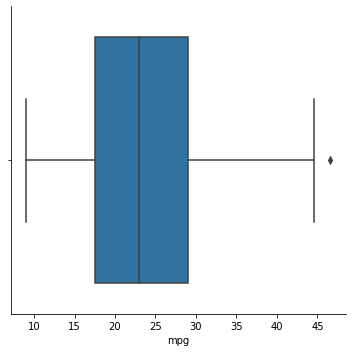

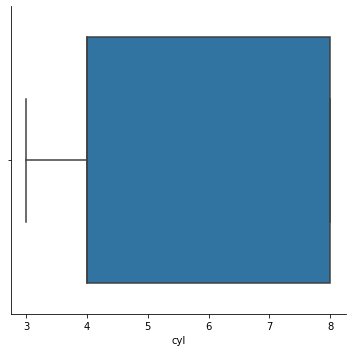

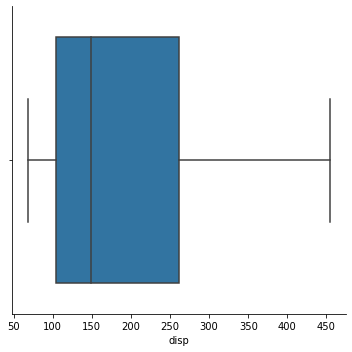

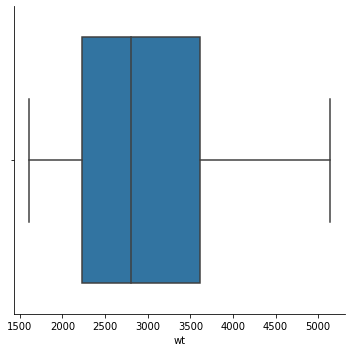

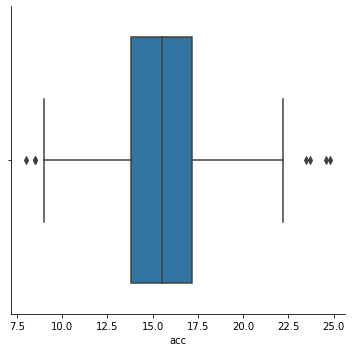

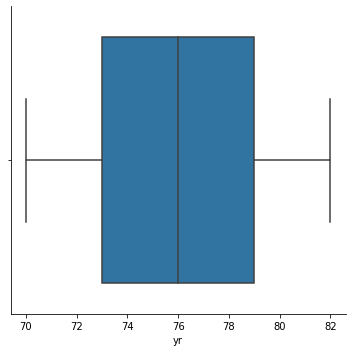

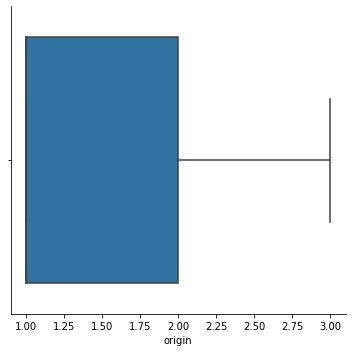

In [11]:

# Plot 5 Point Summary of Numerical Data using boxplot
for col in ['mpg','cyl','disp','wt','acc','yr','origin']:
    #print('This is a boxplot for: ',col)
    print(sns.catplot(x=col, data=car_data, kind='box'));
    #print('')

**Insights**
* The data is not scaled appropriately.
* hp column is of the object datatype and thus not present in the above statistical summary, even though it has numerical values. This needs to be investigated.
* Minimum number of cylinders is 3 and maximum is 8
* Oldest car is 82 years and newest is 70 years
* acc column has outliers

# 2. Data Preparation & Analysis:
### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [12]:
# First check for missing values

# Replace empty places with NaN
car_data_new = car_data.replace(' ',np.nan)

# Calculate percentage of null values for each column
car_data_new.isnull().sum()*100/len(car_data_new)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [13]:
# Check for any missing value in all columns
car_data_new.isnull().values.any()

False

Looks like there is no missing value in the data as the missing value percentage in each column is 0%.
Therefore, no imputation is necessary.

### B. Check for duplicate values in the data and impute with the best suitable approach.

In [14]:
# Show duplicate rows in the dataframe
car_data[car_data.duplicated()]

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []

In [15]:
# Count duplicate rows in the dataframe
car_data.duplicated().sum()

0

There are no duplicate rows. No imputation required.

### C. Plot a pairplot for all features. 

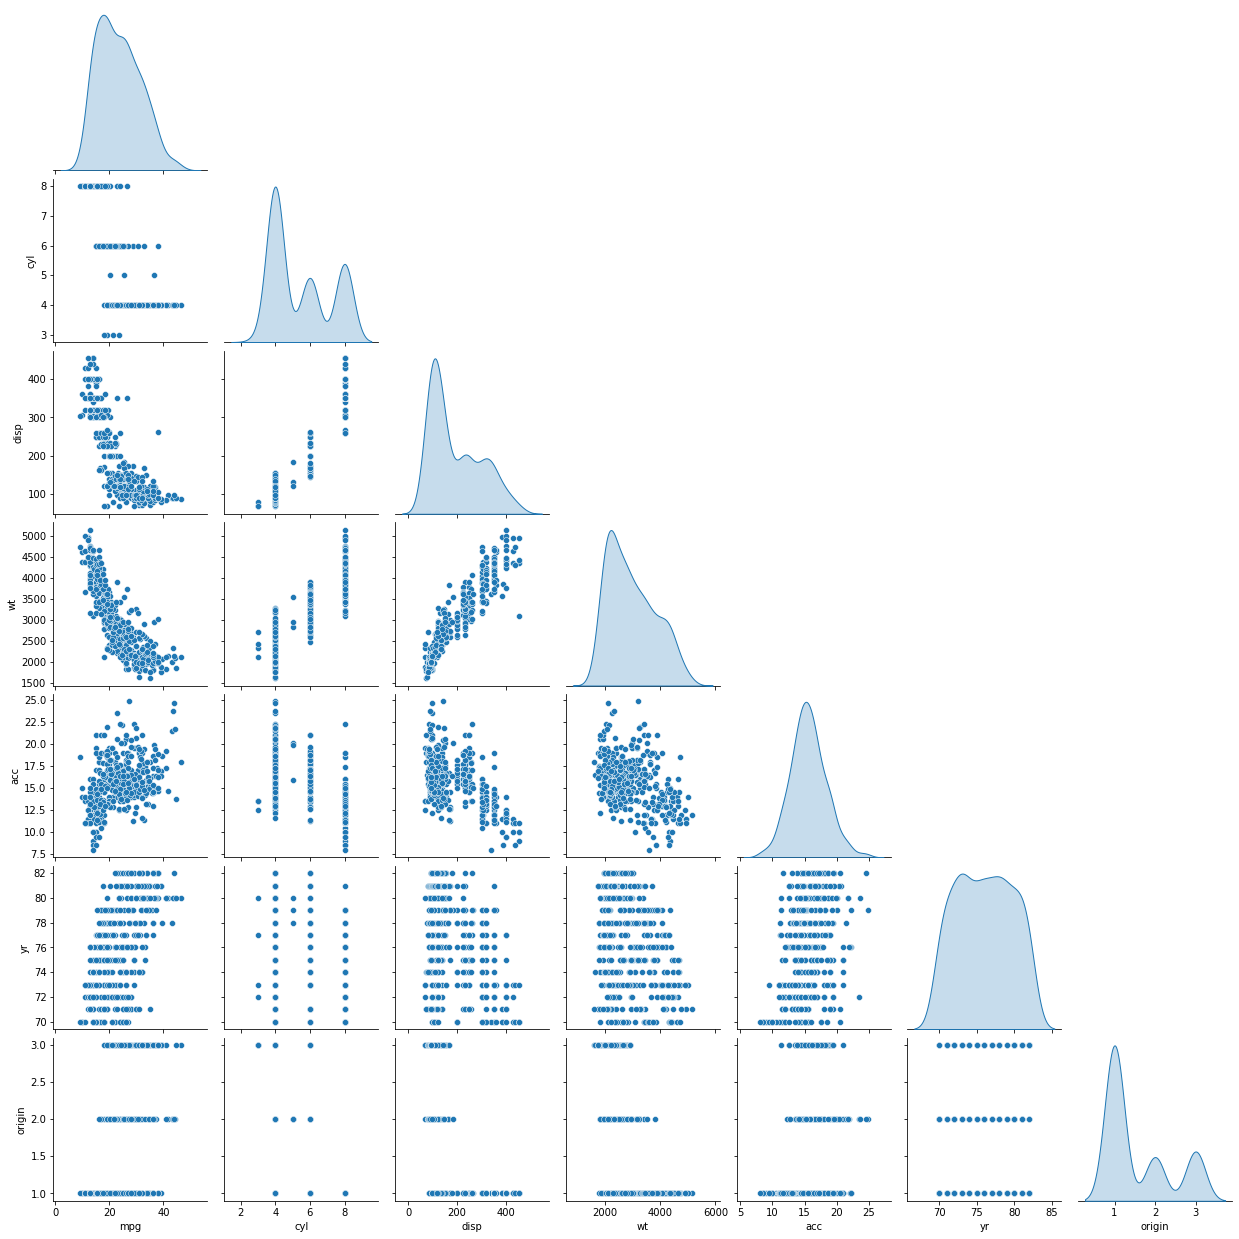

In [16]:
# Plot the pairplot of all features
sns.pairplot(data=car_data, diag_kind = 'kde', corner = True);

hp column data is not plotted indicating some issue with the data inside the column

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

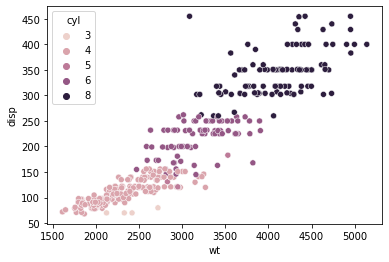

In [17]:
# Plot scatterplot and use cyl for hue
sns.scatterplot(data=car_data, x = 'wt', y = 'disp', hue = 'cyl');

### E. Share insights for Q2.d.

**INSIGHTS**
* Weight and Displacement seems linearly dependent and proprotional.
* Higher number of cylinders is found in cars with higher weight and displacement.
* Same number of cylinders and displacement of an engine can be found in cars with different weights as well.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

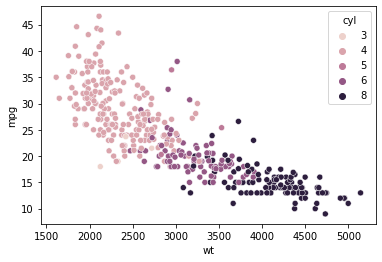

In [18]:
# Plot scatterplot and use cyl for hue
sns.scatterplot(data=car_data, x = 'wt', y = 'mpg', hue = 'cyl');

### G. Share insights for Q2.

**INSIGHTS**
* mpg and wt are inversely proportional. Higher mpg cars have lower weight and vice versa.
* Lower number of cylinders lead to higher mpg and higher number of cylinders lead to lower mpg.

### H. Check for unexpected values in all the features and datapoints with such values.

**[Hint: ‘?’ is present in ‘hp’]**

In [19]:
# Check the records in which hp column has ? values
car_data[car_data['hp']=="?"]

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [20]:
# Check for unexpected values in all columns

# Replace ? places with NaN
car_data_new = car_data.replace('?',np.nan)

# Calculate percentage of null values for each column
car_data_new.isnull().sum()*100/len(car_data_new)

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

1.5% values in hp column are nan as they had ? entries in some rows. This needs to be imputed.
The ideal strategy is to drop them or impute them with the median values. Imputing with mean values can lead to bias due to the presence of outliers.

In [21]:
# Impute with Median values
car_data_new['hp'].fillna((car_data_new['hp'].median()), inplace=True)

# Change datatype of hp to float
car_data_new['hp'] = car_data_new['hp'].astype('float')

# Check the info of the new dataframe after the above treatment
car_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


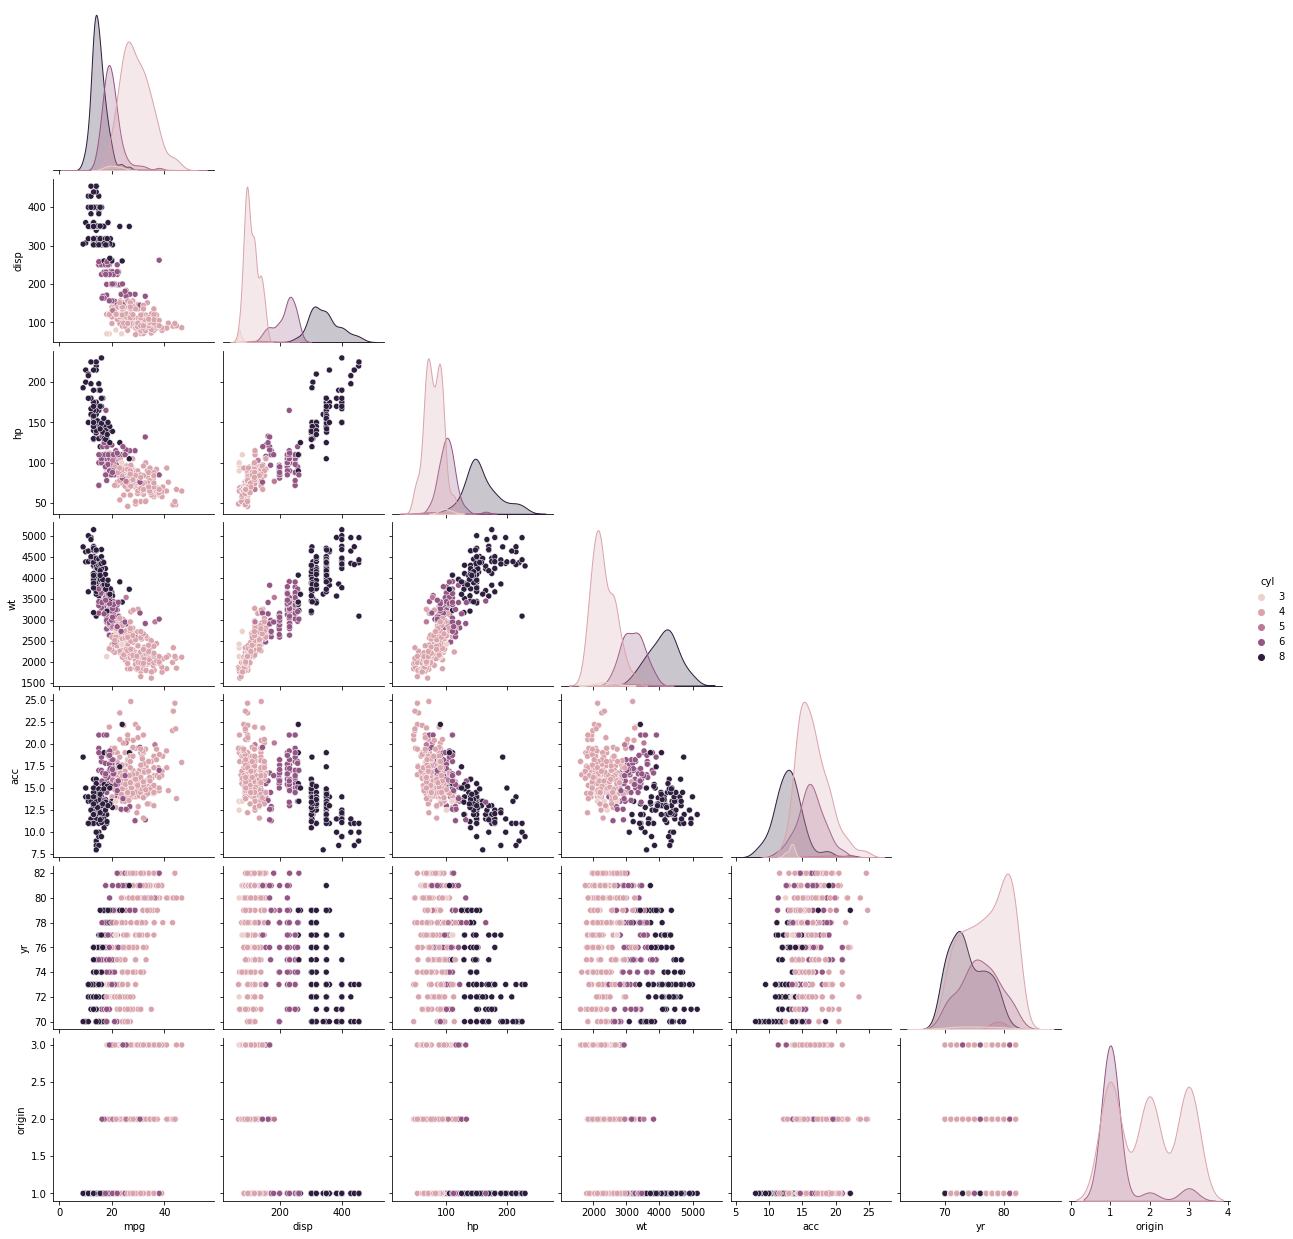

In [22]:
# Plot the pairplot of all features
sns.pairplot(data=car_data_new, diag_kind = 'kde', corner = True, hue = 'cyl');

# 3. Clustering:

### A. Apply K-Means clustering for 2 to 10 clusters.

In [23]:
# Calculate age of vehicle
# Year would be more effective if we can transorm this to calculate age of vehicle. 
# This dataset was used in 1983 so we would subtract year from 83 to get the age
car_data_new['age'] = 83-car_data_new['yr']
car_data_new.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   age  
0   13  
1   13  
2   13  
3   13  
4   13

In [24]:
# Origin indicates production point so should be broken into dummy variables
# We create dummy variables from the origin column
one_hot = pd.get_dummies(car_data_new['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
car_data_new = car_data_new.join(one_hot)
car_data_new.head()

car_name   mpg  cyl   disp     hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140.0  3449  10.5  70       1   

   age  origin_1  origin_2  origin_3  
0   13         1         0         0  
1   13         1         0         0  
2   13         1         0         0  
3   13         1         0         0  
4   13         1         0         0

In [25]:
# Let us now remove duplicate/irrelevant columns

cars_new = car_data_new.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

mpg  cyl   disp     hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0   13         1         0         0
1  15.0    8  350.0  165.0  3693  11.5   13         1         0         0
2  18.0    8  318.0  150.0  3436  11.0   13         1         0         0
3  16.0    8  304.0  150.0  3433  12.0   13         1         0         0
4  17.0    8  302.0  140.0  3449  10.5   13         1         0         0

In [26]:
# Check datatypes of columns
cars_new.dtypes

# Choose numeric columns from the dataframe
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols

# Apply zscore to numeric columns
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)

# Display transformed dataframe
cars_new.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498  1.627426   
1 -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038  1.627426   
2 -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577  1.627426   
3 -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498  1.627426   
4 -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

In [27]:
# Apply K-Means clustering for 2 to 10 clusters
# Define number of clusters in the form of range
cluster_range = range(2,11)

# Create empty list for storing cluster errors
cluster_errors = []

#Create Cluster
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

num_clusters  cluster_errors
0             2     1472.940229
1             3     1108.031031
2             4      892.654455
3             5      807.476045
4             6      737.283161
5             7      678.631311
6             8      645.384529
7             9      599.858786
8            10      558.098880

### B. Plot a visual and find elbow point. 

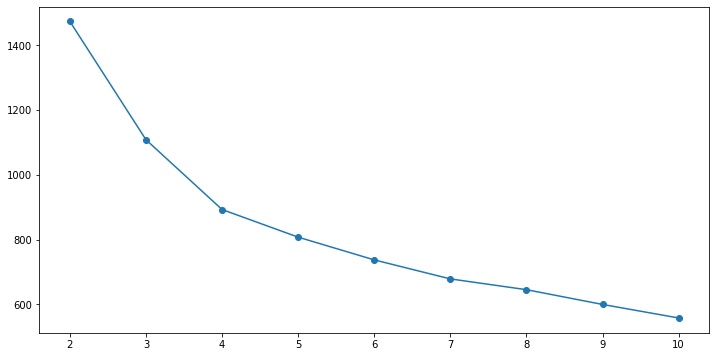

In [28]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

**The bend appears to occur at 4. So 4 clusters need to be created**

### C. On the above visual, highlight which are the possible Elbow points.

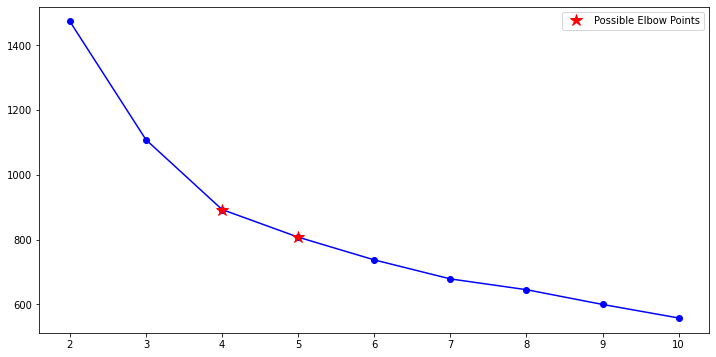

In [29]:
#Plot the figure
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, 'bo-')

# Highlight the possible elbow points in the same figure
plt.plot([4, 5],[892.654455, 807.377856],'r*', markersize=12, label='Possible Elbow Points')
plt.legend(loc = 'best')
plt.show()

### D. Train a K-means clustering model once again on the optimal number of clusters.

In [30]:
# Create a model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, n_init = 5, random_state=12345)
kmeans_5.fit(cars_new)

KMeans(n_clusters=5, n_init=5, random_state=12345)

In [31]:
# Create labels
labels = kmeans_5.labels_

# Calculating silhouette_score
silhouette_score(cars_new,labels)

0.300557005876046

In [32]:
# Create a model with 4 clusters
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [33]:
# Create labels
labels = kmeans.labels_

# Calculating silhouette_score
silhouette_score(cars_new,labels)

0.3223798317285854

In [34]:
# Create a model with 3 clusters
kmeans_3 = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans_3.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [35]:
# Create labels
labels = kmeans_3.labels_

# Calculating silhouette_score
silhouette_score(cars_new,labels)

0.3223798317285854

**The optimal number of clusters should be 4 based on the silhouette score. At 4 there is a sharp drop in the silhouette score.**

In [36]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 95 114  98  91]


In [37]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

0         1         2         3
mpg      -1.158713e+00  1.172644  0.213034 -0.488803
cyl       1.498191e+00 -0.825340 -0.868333  0.405025
disp      1.500684e+00 -0.778107 -0.823983  0.295490
hp        1.514129e+00 -0.744883 -0.553391 -0.051575
wt        1.400016e+00 -0.760687 -0.769895  0.320511
acc      -1.076122e+00  0.410654  0.286859  0.300054
age       6.725559e-01 -1.101793  0.635472 -0.006206
origin_1  1.000000e+00  0.421053  0.244898  0.901099
origin_2 -2.498002e-16  0.184211  0.459184  0.043956
origin_3  1.110223e-16  0.394737  0.295918  0.054945

### E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [38]:
# Add cluster number to original cars data

predictions = kmeans.predict(cars_new)
predictions
car_data["group"] = predictions
car_data['group'] = car_data['group'].astype('category')
car_data.dtypes

car_name      object
mpg          float64
cyl            int64
disp         float64
hp            object
wt             int64
acc          float64
yr             int64
origin         int64
group       category
dtype: object

In [39]:
# Visualize the new dataframe
car_data.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1   

  group  
0     0  
1     0  
2     0  
3     0  
4     0

In [40]:
# Check the groups created
car_data['group'].value_counts().sort_index()

0     95
1    114
2     98
3     91
Name: group, dtype: int64

In [41]:
# Group the clusters
df_analysis = (car_data.groupby(['group'],axis=0)).head()
df_analysis

car_name   mpg  cyl   disp   hp    wt   acc  yr  \
0       chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70   
1               buick skylark 320  15.0    8  350.0  165  3693  11.5  70   
2              plymouth satellite  18.0    8  318.0  150  3436  11.0  70   
3                   amc rebel sst  16.0    8  304.0  150  3433  12.0  70   
4                     ford torino  17.0    8  302.0  140  3449  10.5  70   
14          toyota corona mark ii  24.0    4  113.0   95  2372  15.0  70   
15                plymouth duster  22.0    6  198.0   95  2833  15.5  70   
16                     amc hornet  18.0    6  199.0   97  2774  15.5  70   
17                  ford maverick  21.0    6  200.0   85  2587  16.0  70   
18                   datsun pl510  27.0    4   97.0   88  2130  14.5  70   
19   volkswagen 1131 deluxe sedan  26.0    4   97.0   46  1835  20.5  70   
20                    peugeot 504  25.0    4  110.0   87  2672  17.5  70   
21                    audi 100 ls  24.0    4  107.0   90  2430  14.5  70   
24                    amc gremlin  21.0    6  199.0   90  2648  15.0  70   
33                    amc gremlin  19.0    6  232.0  100  2634  13.0  71   
195            chevrolet chevette  29.0    4   85.0   52  2035  22.2  76   
198                   honda civic  33.0    4   91.0   53  1795  17.4  76   
204                  datsun b-210  32.0    4   85.0   70  1990  17.0  76   
216             honda accord cvcc  31.5    4   98.0   68  2045  18.5  77   
217       buick opel isuzu deluxe  30.0    4  111.0   80  2155  14.8  77   

     origin group  
0         1     0  
1         1     0  
2         1     0  
3         1     0  
4         1     0  
14        3     2  
15        1     3  
16        1     3  
17        1     3  
18        3     2  
19        2     2  
20        2     2  
21        2     2  
24        1     3  
33        1     3  
195       1     1  
198       3     1  
204       3     1  
216       3     1  
217       1     1

### F. Plot a visual and color the datapoints based upon clusters.

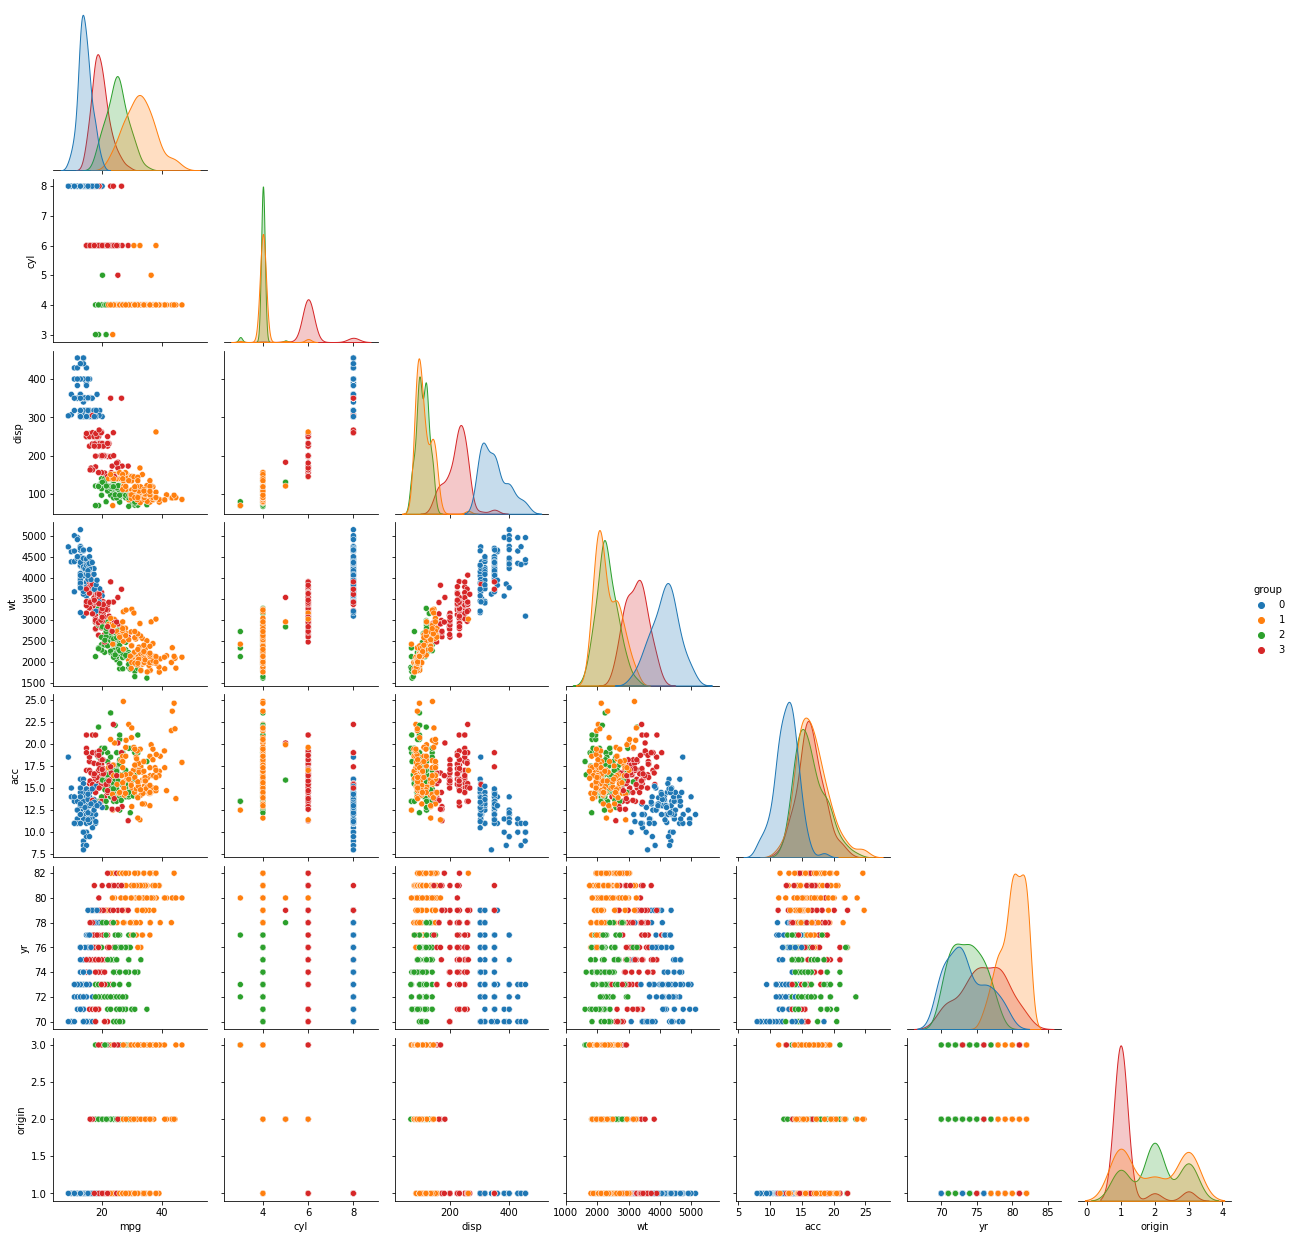

In [42]:
# Plot pairplot with hue as per the identified clusters/group
sns.pairplot(data=car_data, hue='group', corner = True, diag_kind = 'kde');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

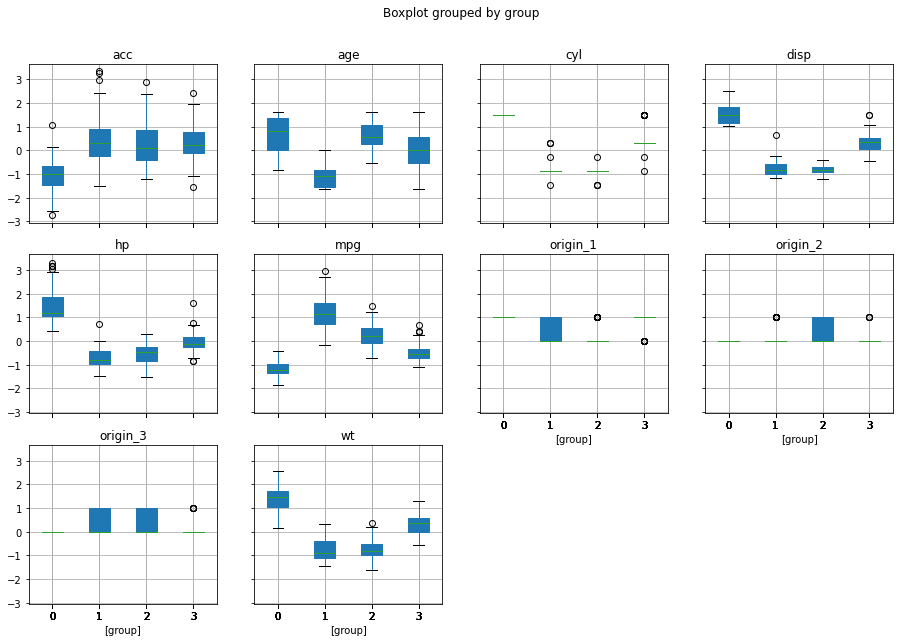

In [43]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10), patch_artist=True);

### G. Pass a new DataPoint and predict which cluster it belongs to. 

In [44]:
# Create a new record dataframe
new_record = [[0.241531,-0.856321,0.370411,-1.448713,-0.888443,1.645441,0.544290,0,0,1]]
 
# Create the pandas DataFrame
new_record = pd.DataFrame(new_record)
 
# print dataframe.
new_record

0         1         2         3         4         5        6  7  8  \
0  0.241531 -0.856321  0.370411 -1.448713 -0.888443  1.645441  0.54429  0  0   

   9  
0  1

In [45]:
# Predict the cluster for the new record with the trained model

kmeans.predict(new_record)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

**The model predicted group for the new record as 2**

# PART B

**DOMAIN:** Automobile

**CONTEXT:** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

* All the features are numeric i.e. geometric features extracted from the silhouette.

**PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model and compare relative results.

## STEPS AND TASK

# 1. Data Understanding & Cleaning: 

### A. Read ‘vehicle.csv’ and save as DataFrame.

In [46]:
# Import vehicle.csv file
vehicle = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vehicle.csv')

# Display a random sample of data from the dataframe
vehicle.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
189           90         36.0                  78.0         179.0   
361          101         46.0                 105.0         195.0   
708           94         49.0                  82.0         137.0   
751           85         36.0                  51.0         115.0   
412           80         43.0                  71.0         133.0   
394           90         49.0                  83.0         187.0   
177           89         44.0                  72.0         160.0   
817          104         53.0                 108.0         204.0   
524          105         52.0                 107.0         207.0   
438           91         49.0                  86.0         195.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
189                  64.0                        8          157.0   
361                  61.0                       10          198.0   
708                  56.0                       10          159.0   
751                  56.0                        5          119.0   
412                  60.0                        7          150.0   
394                  63.0                        7          176.0   
177                  66.0                        7          144.0   
817                  64.0                       11          220.0   
524                  60.0                       11          218.0   
438                  63.0                        8          177.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
189           42.0                    19.0                        126   
361           34.0                    23.0                        150   
708           43.0                    20.0                        160   
751           57.0                    17.0                        124   
412           45.0                    19.0                        146   
394           37.0                    21.0                        154   
177           46.0                    19.0                        147   
817           31.0                    25.0                        172   
524           31.0                    24.0                        167   
438           37.0                    21.0                        156   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
189            182.0              367.0                      142.0   
361            213.0              578.0                      195.0   
708            176.0              367.0                      186.0   
751            139.0              207.0                      127.0   
412            170.0              330.0                      176.0   
394            205.0              467.0                      222.0   
177            166.0              312.0                      169.0   
817            226.0              707.0                      203.0   
524            221.0              701.0                      197.0   
438            203.0              473.0                      201.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
189                         66.0             1.0              20.0   
361                         66.0             7.0              38.0   
708                         76.0            10.0               7.0   
751                         81.0            13.0               5.0   
412                         81.0             6.0              15.0   
394                         70.0             1.0               2.0   
177                         69.0             NaN               1.0   
817                         71.0            14.0              30.0   
524                         66.0             0.0              20.0   
438                         67.0             7.0               5.0   

     skewness_about.2  hollows_ratio class  
189             192.0            198   car  
361             192.0            205   car  
708 

### B. Check percentage of missing values and impute with correct approach.

In [47]:
# Check the datatypes and other attributes of the data frame
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [48]:
# Clearly we have missing values in the dataframe.
# All columns except class are numerical

# Replace empty places with NaN
vehicle1 = vehicle.replace([' ','?'],np.nan)

# Calculate percentage of null values for each column
missing = vehicle1.isnull().sum()*100/len(vehicle1)
missing

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [49]:
# Get List of Columns with missing values
missing_val_col = vehicle.columns[vehicle.isnull().any()].tolist()
missing_val_col

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [50]:
# Impute Missing Values with Median for each column
for col in missing_val_col:
    vehicle1[col] = vehicle1[col].fillna(vehicle1[col].median())
    
# Check if any missing values remain after imputation
vehicle1.isnull().sum()*100/len(vehicle1)

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

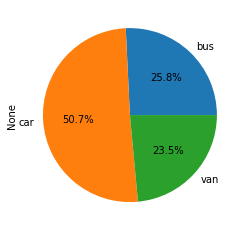

In [51]:
# Plot pie chart with percentage values for class variable
vehicle1.groupby('class').size().plot(kind='pie', autopct='%1.1f%%');

### D. Check for duplicate rows in the data and impute with correct approach.

In [52]:
# Find duplicate rows in vehicle1
vehicle1[vehicle1.duplicated()]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [53]:
 # Find count of duplicate rows
vehicle1.duplicated().sum()

0

There are no duplicate rows in the data and hence no treatment is necessary!

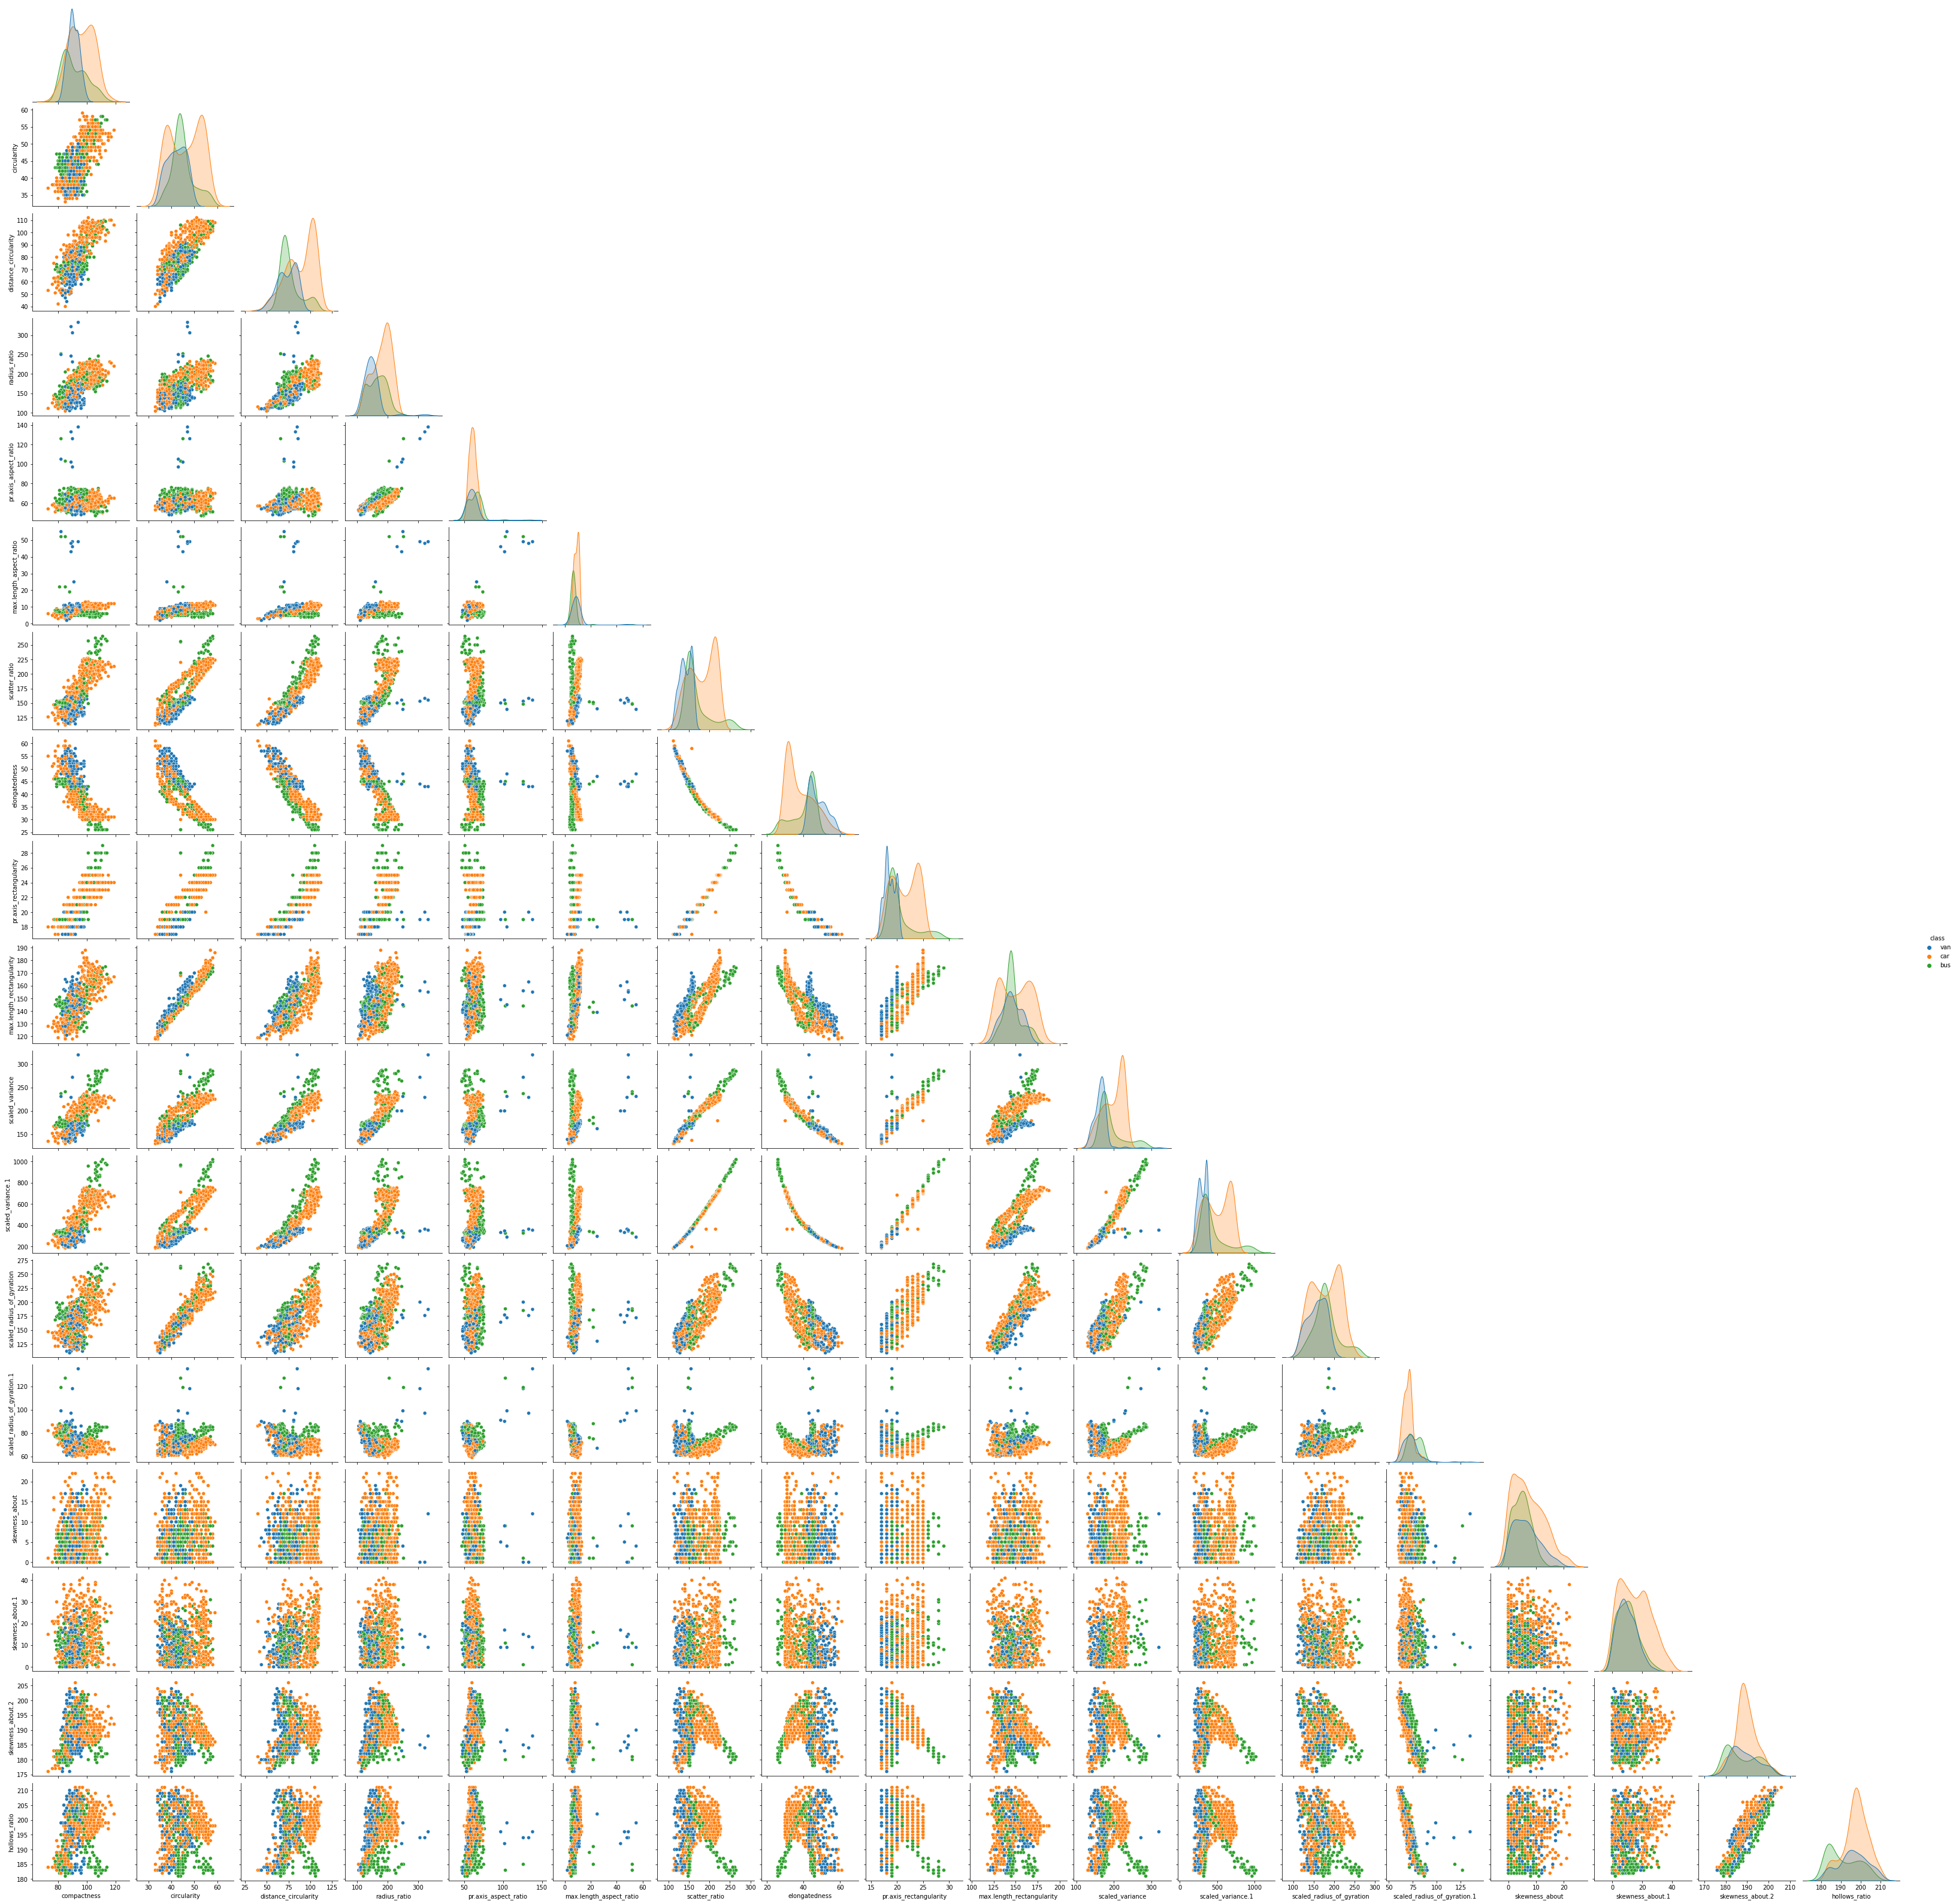

In [54]:
# Plot pairplot of vehicle 1 and classified as per class
sns.pairplot(data=vehicle1, hue = 'class', diag_kind = 'kde', corner = True);

# 2. Data Preparation

### A. Split data into X and Y. [Train and Test optional]

In [55]:
# Let's visualize the head of our dataframe
vehicle1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [56]:
# The target variable is class
# All others are independent variables
# X is the dataframe for independent variables
X = vehicle1.drop(['class'], axis = 1)
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [57]:
# Y is the target variable
Y = vehicle1['class']
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [58]:
# Create train and test

# Split X and Y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Print shape of the data split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 18), (170, 18), (676,), (170,))

### B. Standardize the Data.

In [59]:
# Standardize the X_train and X_test data with Standard Scaler and prevent data leakage

# Standardize Training Data

# Define method
scaler = StandardScaler()

# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Display header of normalized X_train
normalized_x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.581861     0.342899              0.042356      4.503746   
1    -1.550674    -0.148202             -0.649855     -0.894152   
2     0.023647     0.342899              0.168212      4.828210   
3     0.992460     1.488802              1.112135     -0.186231   
4     0.386952     1.652502              0.860422      0.020246   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              8.714319                 8.151668      -0.342929   
1             -0.214036                -0.541322      -0.492452   
2              9.325850                 8.358643      -0.432643   
3             -1.070179                 0.286582       1.301821   
4             -0.947873                 0.286582       1.391534   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.278004               -0.237311                   1.033734   
1       0.405501               -0.621097                  -0.150562   
2       0.278004               -0.621097                   0.476418   
3      -1.251960                1.297833                   1.730378   
4      -1.251960                1.297833                   1.730378   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.248347          -0.439164                   0.012915   
1        -0.290095          -0.534559                   0.074077   
2         4.105453          -0.495278                   0.349302   
3         0.934379           1.272334                   0.777430   
4         0.934379           1.362117                   1.297301   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     3.160152       -1.295902          0.160019   
1                     1.090757       -1.088803          0.270625   
2                     8.074967        1.189289         -0.393012   
3                     0.444071        1.189289          1.597899   
4                     0.314733       -1.295902         -0.946043   

   skewness_about.2  hollows_ratio  
0         -0.797977      -0.216177  
1         -1.125302      -1.280920  
2         -0.143326       0.050008  
3         -0.306989      -0.083085  
4         -0.797977      -0.349270

In [60]:
# Standardize Test Data and prevent data leakage by using transform method
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Display header of normalized X_test
normalized_x_test.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.460760     0.179199             -0.461070     -1.071132   
1     1.840172     1.161401              0.797494      0.580684   
2     0.750257    -0.639303             -0.461070      1.052631   
3     0.750257     0.670300             -0.146429      1.082128   
4     0.144749    -0.475603              0.860422      0.816657   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.825567                 0.493558      -0.283120   
1             -0.458648                -0.955274       1.720484   
2              1.131333                -0.748298       0.195353   
3              1.009026                -0.541322       0.404684   
4              0.397495                 0.079606       0.255162   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.278004               -0.237311                   0.894405   
1      -1.506954                1.681619                   0.685412   
2      -0.614475                0.146475                  -0.707877   
3      -0.741972                0.146475                   0.546083   
4      -0.486978                0.146475                  -0.498884   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.509872          -0.411106                  -0.139988   
1         2.284440           1.872761                   1.266720   
2         0.463428           0.206155                  -0.751600   
3         0.526221           0.419391                   0.685689   
4         0.306444           0.178098                  -0.812761   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.573408       -1.295902          0.381231   
1                     1.220094       -1.295902          0.713050   
2                    -0.073278        0.153793          0.713050   
3                     0.056059       -0.674604          0.049413   
4                    -0.719964       -1.088803          1.819112   

   skewness_about.2  hollows_ratio  
0         -1.125302      -0.482363  
1         -0.306989      -1.280920  
2          1.329638       0.183101  
3          1.493301       0.449287  
4          0.674987       0.582379

# 3. Model Building:

### A. Train a base Classification model using SVM.

In [61]:
# Base SVM Model

# Building a Support Vector Machine on train data
svc1 = SVC(random_state = 111)

# Fit the training data
svc1.fit(normalized_x_train, y_train)

# Make predictions on the test data
svc_y_pred = svc1.predict(normalized_x_test)

# check the accuracy on the training & test set
print("Training accuracy is: ",svc1.score(normalized_x_train, y_train))
print("Test accuracy is: ",svc1.score(normalized_x_test, y_test))

Training accuracy is:  0.9807692307692307
Test accuracy is:  0.9588235294117647


### B. Print Classification metrics for train data.

In [62]:
# Predict classes from training data
svc_y_pred_train = svc1.predict(normalized_x_train)

# Classification Report

# Create list of classes in the target variable class
target_names = ['car','bus','van']

# Print Classification Report for training data
print(classification_report(y_train, svc_y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

         car       0.99      0.98      0.98       181
         bus       0.99      0.99      0.99       339
         van       0.96      0.97      0.96       156

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



Confusion Matrix for Training Data


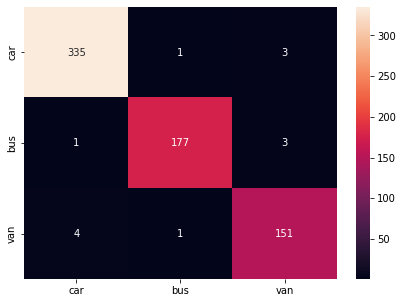

In [63]:
# Confusion Matrix of training data
print("Confusion Matrix for Training Data")

# Calculate & Create the confusion matrix
cm=metrics.confusion_matrix(y_train, svc_y_pred_train, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

# Import plotting library
#import matplotlib.pyplot as plt
#%matplotlib inline

# Plot the confusion matrix
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

### C. Apply PCA on the data with 10 components.

In [64]:
# Create PCA model with 10 components
pca = PCA(n_components=10)

# Fit the training data
pca.fit(normalized_x_train)

# Create reduced dimension data with applied PCA
#data_reduced = pca.fit_transform(normalized_x_train)
#data_reduced.transpose()

PCA(n_components=10)

In [65]:
# generating the covariance matrix and the eigen values for the PCA analysis
# Covariance matrix
cov_matrix = np.cov(normalized_x_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00148148  0.68288411  0.79149453  0.68221511  0.07748053  0.13316939
   0.8106164  -0.78343778  0.81335796  0.67885892  0.75201699  0.81156943
   0.58192296 -0.25159836  0.229138    0.15275846  0.29866555  0.36744677]
 [ 0.68288411  1.00148148  0.79503591  0.61942336  0.14679522  0.23267596
   0.8469733  -0.82379955  0.84071063  0.96173383  0.79377977  0.83368356
   0.92369871  0.039593    0.1429656  -0.00771439 -0.09878982  0.05325642]
 [ 0.79149453  0.79503591  1.00148148  0.76657766  0.14923539  0.24461215
   0.90538129 -0.91396383  0.89409918  0.77803025  0.85775358  0.88577319
   0.7081183  -0.23534514  0.11472585  0.27280808  0.1599696   0.34671282]
 [ 0.68221511  0.61942336  0.76657766  1.00148148  0.66226494  0.46031202
   0.72605683 -0.7809903   0.70097597  0.56768292  0.79376668  0.70900597
   0.5329057  -0.16148913  0.04224024  0.17440558  0.38355712  0.47782313]
 [ 0.07748053  0.14679522  0.14923539  0.66226494  1.00148148  0.6777896
   0.08645814

In [66]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 51.98806456  68.59124406  79.63516122  86.2940129   91.24101338
  94.17167982  96.14351873  97.34724886  98.2462091   98.73208009
  99.09133107  99.34890617  99.54468792  99.70227631  99.82313263
  99.92090716  99.98060873 100.        ]


In [67]:
print('Eigen Values are: ')
print(pca.explained_variance_)

Eigen Values are: 
[9.37171511 2.99299982 1.99085013 1.200369   0.89177929 0.52830147
 0.35545683 0.21699242 0.16205257 0.08758634]


In [68]:
print('Eigen Vectors are: ')
print(pca.components_)

Eigen Vectors are: 
[[ 0.2748878   0.29359836  0.30571078  0.26649475  0.07636955  0.09140801
   0.31743253 -0.31470284  0.31428864  0.28360242  0.30890234  0.31395837
   0.27263337 -0.02191058  0.03985873  0.05917523  0.03122798  0.07547383]
 [-0.12706727  0.12299362 -0.07950362 -0.18749224 -0.11349913  0.01059311
   0.04879601  0.01255044  0.05953909  0.11435521  0.06743156  0.05587814
   0.21245299  0.48424857 -0.04872908 -0.13117017 -0.54211229 -0.5425212 ]
 [-0.1131531  -0.02645709 -0.05427992  0.28098718  0.63525869  0.59163059
  -0.09727333  0.05851057 -0.10935592 -0.02252225  0.07180747 -0.10736665
  -0.03439895  0.29767498 -0.10763348 -0.0719761   0.01678257  0.04625599]
 [ 0.08439892  0.17976945 -0.06527966 -0.0362176   0.03859637  0.02650593
  -0.09528189  0.08299608 -0.09209965  0.17795457 -0.11686954 -0.09052843
   0.19597764 -0.06269049  0.62063936 -0.65819172  0.10835982  0.04831751]
 [ 0.06818152 -0.09553424  0.04604757 -0.04155162 -0.03895202  0.19187441
  -0.0090927  

In [69]:
print('The percentage of variation explained by each eigen Vector: ')
print(pca.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector: 
[0.51988065 0.1660318  0.11043917 0.06658852 0.04947    0.02930666
 0.01971839 0.0120373  0.0089896  0.00485871]


In [70]:
# Create new dataset with the trained PCA model
pca_data = pca.transform(normalized_x_train)
pca_data

array([[ 2.68537705e+00,  6.41161453e-01,  1.29124986e+01, ...,
        -1.94939525e-02, -1.37447811e+00,  3.45141381e-01],
       [-1.91473510e+00,  2.16057348e+00,  2.84060546e-02, ...,
        -2.91902572e-02,  3.77666299e-01,  8.65318988e-02],
       [ 3.69107270e+00,  2.42832137e+00,  1.49607509e+01, ...,
         1.21706857e+00,  1.13547424e+00,  8.06770428e-02],
       ...,
       [ 4.45594431e-02, -1.53445229e+00, -6.40693942e-02, ...,
        -7.26459129e-01, -6.06129468e-02, -3.74090287e-02],
       [-5.94390302e-01,  1.66176658e+00, -1.66653025e-01, ...,
         4.05896761e-01,  1.06854042e-02,  3.03615712e-01],
       [ 2.84326630e+00,  2.18778344e+00,  1.32909814e+01, ...,
         7.33592301e-01,  5.08093260e-01, -5.56033007e-01]])

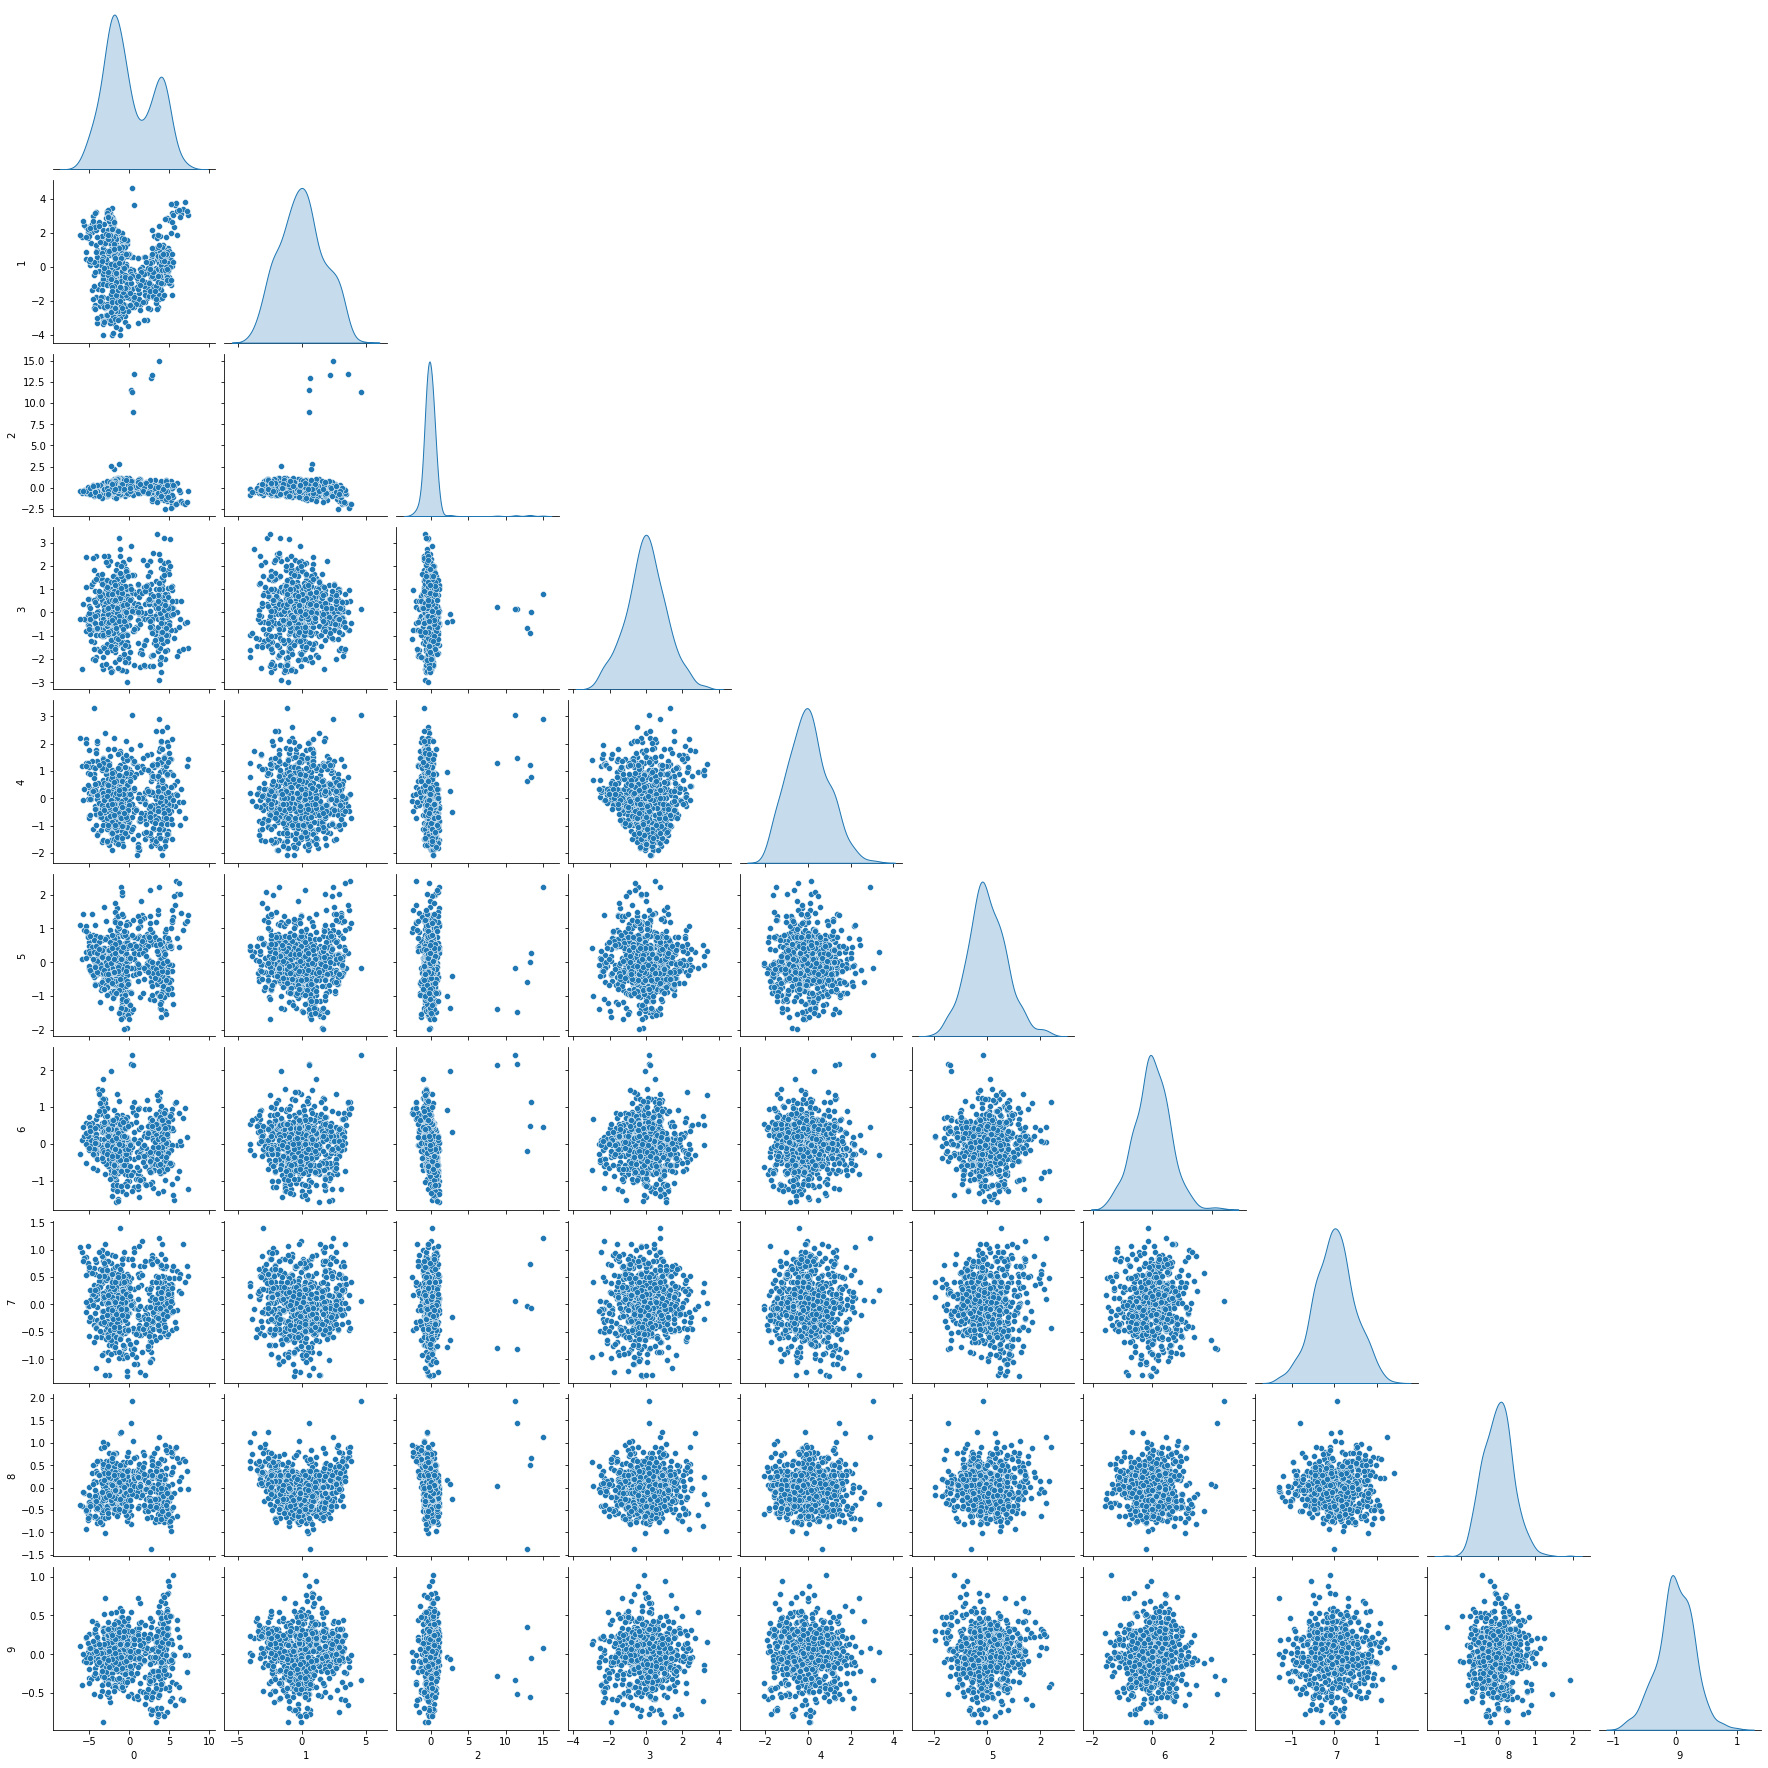

In [71]:
# Plot the resulting pairplot from reduced data
sns.pairplot(pd.DataFrame(pca_data), diag_kind = 'kde', corner = True);

### D. Visualize Cumulative Variance Explained with Number of Components.

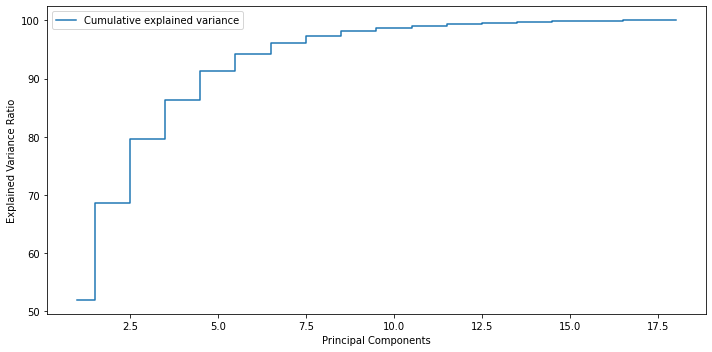

In [72]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
# plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

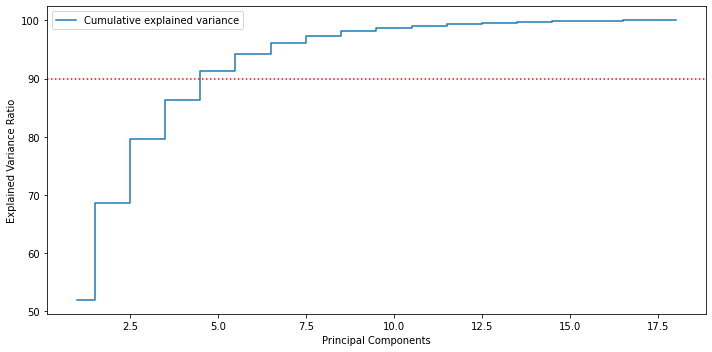

In [73]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')

# Plot horizontal line
# matplotlib.pyplot.axhline(y, xmin, xmax, color, label)

plt.axhline(90, 0, 20, color='red', linestyle='dotted')

plt.tight_layout()
plt.show()

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [74]:
# Create PCA model with 5 components as 90% or more variance is explained by this
pca1 = PCA(n_components=5)

# Fit the training data
pca1.fit(normalized_x_train)

PCA(n_components=5)

In [75]:
# Check out the new components
df_comp1 = pd.DataFrame(pca1.components_,columns=list(normalized_x_train))
df_comp1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.274888     0.293598              0.305711      0.266495   
1    -0.127067     0.122994             -0.079504     -0.187492   
2    -0.113153    -0.026457             -0.054280      0.280987   
3     0.084399     0.179769             -0.065280     -0.036218   
4     0.068182    -0.095534              0.046048     -0.041552   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.076370                 0.091408       0.317433   
1             -0.113499                 0.010593       0.048796   
2              0.635259                 0.591631      -0.097273   
3              0.038596                 0.026506      -0.095282   
4             -0.038952                 0.191874      -0.009093   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.314703                0.314289                   0.283602   
1       0.012550                0.059539                   0.114355   
2       0.058511               -0.109356                  -0.022522   
3       0.082996               -0.092100                   0.177955   
4       0.074615                0.009736                  -0.078700   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.308902           0.313958                   0.272633   
1         0.067432           0.055878                   0.212453   
2         0.071807          -0.107367                  -0.034399   
3        -0.116870          -0.090528                   0.195978   
4         0.010981          -0.010887                  -0.066677   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.021911        0.039859          0.059175   
1                     0.484249       -0.048729         -0.131170   
2                     0.297675       -0.107633         -0.071976   
3                    -0.062690        0.620639         -0.658192   
4                     0.152632        0.726120          0.605098   

   skewness_about.2  hollows_ratio  
0          0.031228       0.075474  
1         -0.542112      -0.542521  
2          0.016783       0.046256  
3          0.108360       0.048318  
4         -0.096631      -0.037324

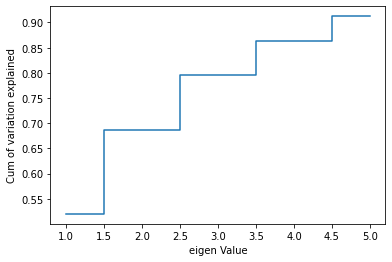

In [76]:
# Plot cumulative variances vs eigen values
plt.step(list(range(1,6)),np.cumsum(pca1.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [77]:
# Create new dataset with the trained PCA model
pca1_data = pca1.transform(normalized_x_train)
pca1_data

array([[ 2.68537705,  0.64116145, 12.91249858, -0.64761694,  0.64822572],
       [-1.9147351 ,  2.16057348,  0.02840605, -1.00360621, -0.44545286],
       [ 3.6910727 ,  2.42832137, 14.96075092,  0.77651727,  2.89508444],
       ...,
       [ 0.04455944, -1.53445229, -0.06406939, -1.69880018,  0.15417026],
       [-0.5943903 ,  1.66176658, -0.16665303, -0.38560996, -0.53003688],
       [ 2.8432663 ,  2.18778344, 13.29098139, -0.88750177,  1.22038393]])

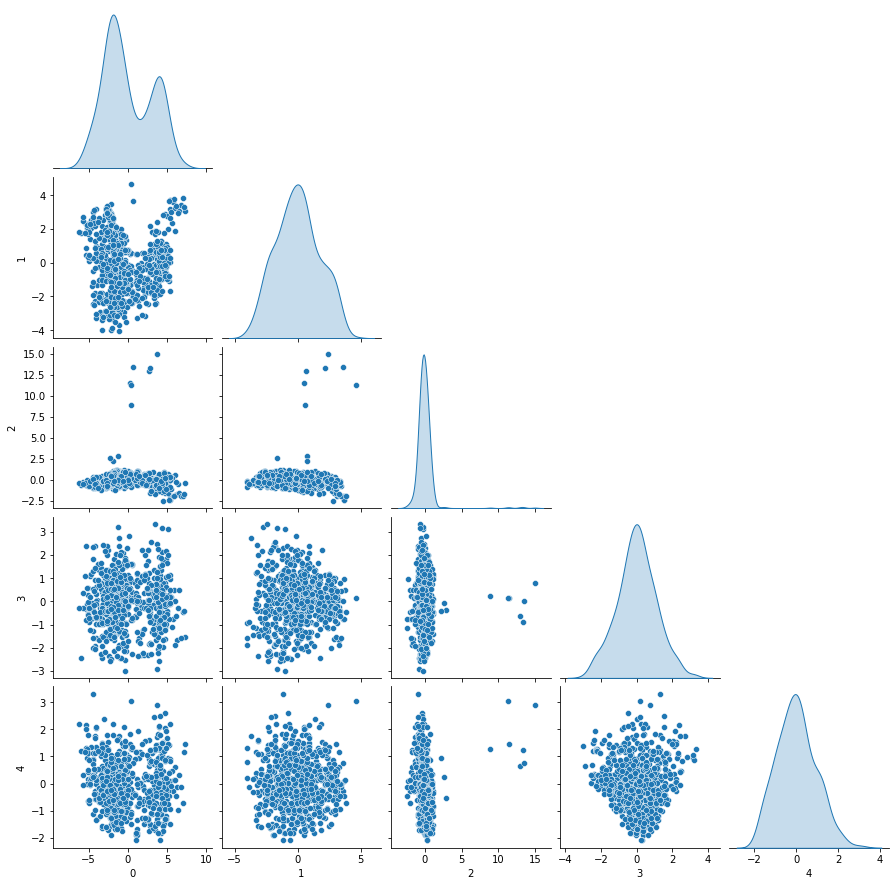

In [78]:
# Plot the resulting pairplot from reduced data
sns.pairplot(pd.DataFrame(pca1_data), diag_kind = 'kde', corner = True);

### G. Train SVM model on components selected from above step.

In [79]:
# Building a Support Vector Machine on data from above step
svc2 = SVC(random_state = 111)

# Fit the training data
svc2.fit(pca1_data, y_train)

# check the accuracy on the training set
print("Training accuracy is: ",svc2.score(pca1_data, y_train))

Training accuracy is:  0.7973372781065089


### H. Print Classification metrics for train data of above model and share insights.

In [80]:
# Predict classes from training data
svc2_y_pred_train = svc2.predict(pca1_data)

# Classification Report

# Import Classification Report Library
# from sklearn.metrics import classification_report

# Create list of classes in the target variable class
target_names = ['car','bus','van']

# Print Classification Report for training data
print(classification_report(y_train, svc2_y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

         car       0.82      0.70      0.75       181
         bus       0.85      0.87      0.86       339
         van       0.67      0.76      0.71       156

    accuracy                           0.80       676
   macro avg       0.78      0.77      0.78       676
weighted avg       0.80      0.80      0.80       676



Confusion Matrix for Training Data with PCA


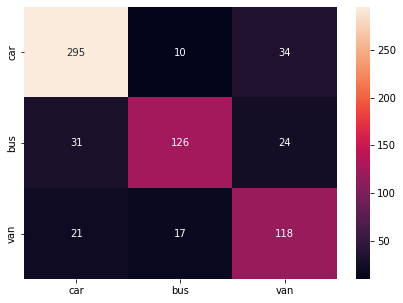

In [81]:
# Confusion Matrix of training data
print("Confusion Matrix for Training Data with PCA")

# Calculate & Create the confusion matrix
cm=metrics.confusion_matrix(y_train, svc2_y_pred_train, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

# Import plotting library
# import matplotlib.pyplot as plt
# %matplotlib inline

# Plot the confusion matrix
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

# 4. Performance Improvement:

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

[LibSVM]              precision    recall  f1-score   support

         car       0.83      0.86      0.85       181
         bus       0.96      0.83      0.89       339
         van       0.73      0.91      0.81       156

    accuracy                           0.86       676
   macro avg       0.84      0.87      0.85       676
weighted avg       0.87      0.86      0.86       676

Confusion Matrix for Training Data with PCA


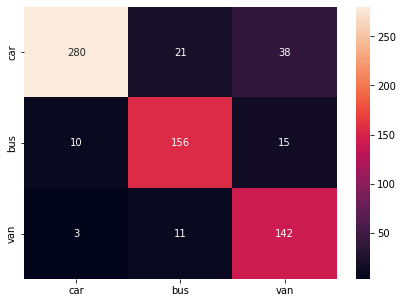

In [82]:
# Already trained a base SVM model in Q.3 G. on the components out of PCA
# Manually tune the hyperparameters
clf = SVC(gamma=0.1, C=5, random_state=111, kernel='rbf', class_weight='balanced', verbose=3)

# Fit the training data
clf.fit(pca1_data, y_train)

# check the accuracy on the training set
# print("Training accuracy is: ",clf.score(pca1_data, y_train))

# Predict classes from training data
clf_y_pred_train = clf.predict(pca1_data)

# Print Classification Report for training data
print(classification_report(y_train, clf_y_pred_train, target_names=target_names))

from sklearn.metrics import accuracy_score, confusion_matrix

# Confusion Matrix of training data
print("Confusion Matrix for Training Data with PCA")

# Calculate & Create the confusion matrix
cm=metrics.confusion_matrix(y_train, clf_y_pred_train, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

# Plot the confusion matrix
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

In [83]:
# Use GridSearchCV to tune hyperparameters 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              }
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(pca1_data, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### B. Share best Parameters observed from above step.

In [84]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

In [85]:
# predict on training data
grid_predictions = grid.predict(pca1_data)
 
# print classification report
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

         bus       0.89      0.86      0.87       181
         car       0.91      0.94      0.92       339
         van       0.84      0.82      0.83       156

    accuracy                           0.89       676
   macro avg       0.88      0.87      0.87       676
weighted avg       0.89      0.89      0.89       676



Confusion Matrix for Training Data with PCA and GridSearchCV


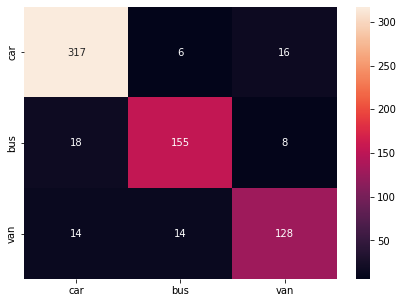

In [86]:
# Confusion Matrix of training data
print("Confusion Matrix for Training Data with PCA and GridSearchCV")

# Calculate & Create the confusion matrix
cm=metrics.confusion_matrix(y_train, grid_predictions, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

# Plot the confusion matrix
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

* The base model trained on normalized data gives a very good result. It has high accuracy, precision, recall, f1-score and very low misclassifications.
* After reducing the data using PCA technique, the above parameters dropped significantly and we see a lot of misclassification.
* Through manual hyperparameter tuning,some accuracy loss was recovered. As the dataset provided is unbalanced, it was able to reduce misclassification of the minority classes. But there was an increase in the misclassification of the majority class as well due to the balancing.
* Finally, GridSearchCV technqiue was used for hyperparameter tuning. A significant increase in all performance metrics was observed, over and above that of manual tuning. An increase in the majority class (car) is observed and consequently a reduction in the minority class (van) is also observed.

# 5. Data Understanding & Cleaning:

### A. Explain pre-requisite/assumptions of PCA.

**Pre-requisites of using PCA**

* Whenever we want to ensure that variables in data are independent to each other.
* When we want to reduce the number of variables in a data set with many variables in it.
* When we want to interpret data and variable selection out of it.
* Data needs to be standardized before implementing PCA else it becomes difficult to identify optimal principal components.

**Assumptions of PCA**

* Independent variables are highly correlated to each other.
* There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
* Variables included are metric level or nominal level.
* Features are low dimensional in nature.
* Independent variables are numeric in nature.
* PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

### B. Explain advantages and limitations of PCA.

**Advantages**

* PCA is a widely used technique for decreasing the dimensions of a feature set.
* PCA can be used as a data reduction technique as it allows us to find the most important variables that are needed to describe a dataset. 
* PCA can also be used to reduce the dimensionality of the data space in order to get insight on the inner structure of the data. This is helpful when dealing with large datasets.
* Principal components are independent of each other, so removes correlated features.
* PCA improves the performance of the ML algorithm as it eliminates correlated variables that don't contribute in any decision making.
* PCA helps in overcoming data overfitting issues by decreasing the number of features.
* PCA results in high variance and thus improves visualization.
* Reduction of noise since the maximum variation basis is chosen and so the small variations in the background are ignored automatically.


**Limitations**

* PCA effectiveness depends upon the scales of the attributes. If attributes have different scales, PCA will pick variable with highest variance rather than picking up attributes based on correlation
* Changing scales of the variables can change the PCA
* Interpreting PCA can become challenging due to presence of discrete data
* Presence of skew in data with long thick tail can impact the effectiveness of the PCA
* PCA assumes linear relationship between attributes. It is ineffective when relationships are non linear
* PCA can also lead to low model performance after applying it if the original dataset has a weak correlation or no correlation. The variables need to be related to one other to apply PCA perfectly.
* It is not suitable for small data sets 
*  It does not find the important factors but selects them based on the values. So, it is difficult to find the important factors.
* It does not have a strong mathematical structure behind it.
* It cannot find any non-linear relationships.